In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# !pip install geopandas shapely mapclassify
import geopandas as gpd
from shapely.geometry import Polygon
import mapclassify
import os

from google.colab import drive
drive.mount('/content/drive')

pd.set_option("display.max_columns", 99)
# os.chdir("/home/joosungm/projects/def-lelliott/joosungm/projects/ssc23-case-comp/")
os.chdir("/content/drive/MyDrive/projects/ssc23-case-comp")

In [6]:
# Merge all the data

prov_short = ["AB", "BC", "MB", "NB", "NL", "NS", "ON", "PE", "QC", "SK"]
prov_long = ["Alberta", "British_Columbia", "Manitoba", "New_Brunswick", 
             "Newfoundland_and_Labrador", "Nova_Scotia", "Ontario", 
             "Prince_Edward_Island", "Quebec", "Saskatchewan"]

# geo_df = pd.DataFrame()
prod_temp = pd.DataFrame()
cf_prov_tmax = pd.DataFrame()
cf_prov_tmin = pd.DataFrame()

for i, prov in enumerate(prov_short):
    # i_prov = 0
    
    # # - geometry data
    # temp_geo_filename = "./data/geojson_files/1.a_census_data_" + prov + "_CSD_geometry_only.geojson"
    # temp_geo_df = gpd.read_file(temp_geo_filename)
    # geo_df = pd.concat([geo_df, temp_geo_df], axis = 0)

    # - prod_temp data
    #   Contains: GeoUID, Dominant_NAICS, etc
    temp_prod_temp_filename = "./data/user_data/01_iv_analysis/" + prov + "/prod_temp.csv"
    temp_prod_temp = pd.read_csv(temp_prod_temp_filename)
    prod_temp = pd.concat([prod_temp, temp_prod_temp], axis = 0)

    # - cf result data
    temp_cf_tmax_filename = "./data/user_data/02_counterfactual_analysis/" + prov + "/result_tmax_flag.csv"
    temp_cf_tmax = pd.read_csv(temp_cf_tmax_filename)
    temp_cf_tmax["provincename"] = prov_long[i]
    cf_prov_tmax = pd.concat([cf_prov_tmax, temp_cf_tmax], axis = 0)

    temp_cf_tmin_filename = "./data/user_data/02_counterfactual_analysis/" + prov + "/result_tmin_flag.csv"
    temp_cf_tmin = pd.read_csv(temp_cf_tmin_filename)
    temp_cf_tmin["provincename"] = prov_long[i]
    cf_prov_tmin = pd.concat([cf_prov_tmin, temp_cf_tmin], axis = 0)
    
# geo_df.to_csv("./data/user_data/01_cf_analysis/B04_geo_df.csv", index = False)
prod_temp.to_csv("./data/user_data/02_counterfactual_analysis/B04_prod_temp.csv", index = False)
cf_prov_tmax.to_csv("./data/user_data/02_counterfactual_analysis/B04_cf_tmax.csv", index = False)
cf_prov_tmin.to_csv("./data/user_data/02_counterfactual_analysis/B04_cf_tmin.csv", index = False)

In [8]:
# Load data

prod_temp = pd.read_csv("./data/user_data/01_iv_analysis/C01_prod_temp.csv")
cf_prov_tmax = pd.read_csv("./data/user_data/02_counterfactual_analysis/B04_cf_tmax.csv")
cf_prov_tmin = pd.read_csv("./data/user_data/02_counterfactual_analysis/B04_cf_tmin.csv")

print(prod_temp.shape)
# print(prod_temp.columns)

print(cf_prov_tmax.shape)
# print(iv_prov.columns)

print(cf_prov_tmin.shape)
# print(iv_all.columns)

# - Load province and CSD boundaries (from Statistics Canada)
prov_shapefile = './data/user_data/_other/lpr_000b21a_e.shp'
province = gpd.read_file(prov_shapefile)
province = province.iloc[0:10, :]

csd_shapefile = './data/user_data/_other/lcsd000b21a_e.shp'
csd = gpd.read_file(csd_shapefile)

(1516200, 32)
(140, 7)
(140, 7)


,Date,provincename,production_in_division_X22.Utilities,production_in_division_X23.Construction,production_in_division_X31.33.Manufacturing,production_in_division_X48.49.Transportation.and.warehousing,production_in_division_X61.Educational.services,production_in_division_X62.Health.care.and.social.assistance,production_in_division_X72.Accommodation.and.food.services,production_in_division_X81.Other.services..except.public.administration.,production_in_division_X91.Public.administration,production_in_division_X11.Agriculture.forestry.fishing.hunting.21.Mining.quarrying.and.oil.and.gas.extraction,production_in_division_X41.Wholesale.trade.44.45.Retail.trade,production_in_division_X52.Finance.and.insurance.53.Real.estate.and.rental.and.leasing,production_in_division_X54.Professional..scientific.and.technical.services.55.56,production_in_division_X51.Information.culture.and.recreation.71,Population,GeoUID,census_year_ref,Dominant_NAICS,colourval,max_lat,min_lat,max_long,min_long,month,year,tavg,tmin,tmax,lat,long
328407,2014-04-01,British Columbia,0.000000,0.891297,0.927759,0.000000,1.464189,0.872335,0.305405,0.000000,3.455808,3.818442,0.000000,0.000000,0.644999,0.758591,401.0,5951810,CA16,X11.Agriculture.forestry.fishing.hunting.21.Mi...,#8DA0CB,54.6766,54.6459,-124.6881,-124.7818,4,2014,4.206667,-14.0,17.5,54.570156,-124.502330
712952,2009-09-01,Ontario,45.757065,45.633089,119.424236,23.015165,38.329011,109.078544,20.728722,19.520681,42.602825,13.559120,108.613697,91.829026,56.186860,31.912127,21341.0,3542059,CA16,X31.33.Manufacturing,#4DAF4A,44.6096,44.5409,-80.8893,-80.9643,9,2009,15.015000,1.4,25.2,44.574911,-80.925876
710541,2008-10-01,Ontario,24.759817,66.680425,127.245024,23.598216,21.750047,38.602627,8.455612,14.773086,20.177466,75.008599,54.777407,61.516190,33.657833,17.766293,12518.0,3542004,CA16,X31.33.Manufacturing,#4DAF4A,44.3425,43.9679,-80.6237,-81.0694,10,2008,7.354839,-7.0,25.5,44.176584,-80.858068
1022631,2016-04-01,Quebec,0.000000,4.154375,14.268193,1.162217,1.938066,3.195527,0.443585,0.766059,3.441610,12.397335,6.295904,2.695331,2.440149,1.453741,1307.0,2449025,CA16,X31.33.Manufacturing,#4DAF4A,45.8268,45.6884,-72.2245,-72.3863,4,2016,3.623333,-12.0,22.0,45.752893,-72.307669
972220,2015-05-01,Quebec,0.000000,2.569698,8.675467,2.694364,0.707919,2.951926,0.275988,1.336981,1.452678,8.441977,3.693249,6.559118,1.370674,0.764318,846.0,2435020,CA16,X31.33.Manufacturing,#4DAF4A,46.7072,46.6075,-72.4197,-72.5754,5,2015,13.651613,-3.0,28.0,46.659064,-72.497123
653387,2020-12-01,Ontario,21.130929,77.461155,101.074401,23.160819,37.328921,66.027332,12.709339,12.461968,69.098675,34.887179,91.014699,91.793690,50.388267,17.574084,15892.0,3511015,CA16,X31.33.Manufacturing,#4DAF4A,44.4199,44.0480,-76.8144,-77.1396,12,2020,-2.296774,-14.5,8.0,44.230437,-76.987300
869873,2011-06-01,Quebec,0.000000,0.000000,0.974932,0.000000,0.000000,0.509934,0.000000,0.401825,0.000000,2.126363,0.000000,0.000000,0.000000,0.000000,86.0,2408010,CA16,X11.Agriculture.forestry.fishing.hunting.21.Mi...,#8DA0CB,48.8995,48.7867,-67.0006,-67.2124,6,2011,12.684615,0.0,28.0,48.839767,-67.106044
569929,2016-02-01,Newfoundland and Labrador,0.000000,1.381867,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.0,1007040,CA16,X23.Construction,#377EB8,48.5125,48.4954,-54.1961,-54.2304,2,2016,-3.882759,-18.7,11.0,48.504116,-54.212352
1209889,2021-02-01,Quebec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2497914,CA16,NaN,NaN,55.0001,54.7082,-66.6027,-67.2192,2,2021,-18.092857,-36.0,-2.6,54.901863,-66.880379
573361,2002-02-01,Newfoundland and Labrador,0.000000,0.434865,2.394327,0.749351,0.000000,0.502963,0.000000,0.000000,0.000000,9.740103,0.000000,0.000000,0.000000,0.000000,266.0,1007054,CA16,X11.Agriculture.forestry.fishing.hunting.21.Mi...,#8DA0CB,49.0822,49.0640,-53.5599,-53.5919,2,2002,-5.775000,-22.0,9.5,49.073646,-53.576917


In [10]:
csd.head()

,CSDUID,DGUID,CSDNAME,CSDTYPE,LANDAREA,PRUID,geometry
0,1001101,2021A00051001101,"Division No. 1, Subd. V",SNO,870.8928,10,"MULTIPOLYGON (((8991051.954 2038839.069, 89910..."
1,1001105,2021A00051001105,Portugal Cove South,T,1.0770,10,"POLYGON ((9001504.369 2049856.597, 9001184.977..."
2,1001113,2021A00051001113,Trepassey,T,54.2130,10,"POLYGON ((8992311.551 2054468.074, 8994001.626..."
3,1001120,2021A00051001120,St. Shott's,T,1.0729,10,"POLYGON ((8985240.566 2028560.540, 8984967.974..."
4,1001124,2021A00051001124,"Division No. 1, Subd. U",SNO,742.3781,10,"MULTIPOLYGON (((8995265.971 2098624.091, 89952..."


In [28]:
prod_temp["GeoUID"] = prod_temp["GeoUID"].astype(str)
prod_temp["provincename"] = prod_temp["provincename"].str.replace(" ", "_")

merged_data = prod_temp.loc[prod_temp.month == 12, 
    ["GeoUID", "provincename", "Dominant_NAICS"]].drop_duplicates().merge(
        right = csd[["CSDUID", "CSDNAME", "geometry"]],
        left_on = "GeoUID", 
        right_on = "CSDUID",
        how = "left").merge(
            right = cf_prov_tmax[["provincename", "Industry", "mean(ATE)", "sig"]].rename(
                columns = {"mean(ATE)":"ATE(tmax)", "sig":"sig(tmax)"}),
            left_on = ["provincename", "Dominant_NAICS"],
            right_on = ["provincename", "Industry"],
            how = "left"
        ).drop(columns = ["CSDUID", "Industry"]).merge(
            right = cf_prov_tmin[["provincename", "Industry", "mean(ATE)", "sig"]].rename(
                columns = {"mean(ATE)":"ATE(tmin)", "sig":"sig(tmin)"}),
            left_on = ["provincename", "Dominant_NAICS"],
            right_on = ["provincename", "Industry"],
            how = "left"
        ).drop(columns = ["Industry"]).reset_index(drop = True).sort_values(by = "GeoUID")
# print(merged_data.shape)
# merged_data.head(10)

# - If Dominant_NAICS == NaN, then ATE(tmax) = None
merged_data.loc[pd.isnull(merged_data["Dominant_NAICS"]), ["ATE(tmax)", "ATE(tmin)"]] = None

# - If sig(tmax) == False, then ATE(tmax) = 0. Same for sig(tmin)
merged_data.loc[merged_data["sig(tmax)"] == False, "ATE(tmax)"] = 0
merged_data.loc[merged_data["sig(tmin)"] == False, "ATE(tmin)"] = 0

# - Split into two sets
merged_tmax = merged_data[["GeoUID", "CSDNAME", "provincename", "Dominant_NAICS", "ATE(tmax)", "sig(tmax)", "geometry"]].sort_values(
    by = ["GeoUID", "sig(tmax)", "ATE(tmax)"],
    ascending = [True, False, False]).drop_duplicates(
        subset = "GeoUID", keep = "first").reset_index(drop = True)

merged_tmin = merged_data[["GeoUID", "CSDNAME", "provincename", "Dominant_NAICS", "ATE(tmin)", "sig(tmin)", "geometry"]].sort_values(
    by = ["GeoUID", "sig(tmin)", "ATE(tmin)"],
    ascending = [True, False, False]).drop_duplicates(
        subset = "GeoUID", keep = "first").reset_index(drop = True)

# - Create GeoDataFrames
country_tmax = gpd.GeoDataFrame(merged_tmax, geometry = "geometry", crs = province.crs)
country_tmin = gpd.GeoDataFrame(merged_tmin, geometry = "geometry", crs = province.crs)

(7056, 9)


In [32]:
print(np.max(country_tmax["ATE(tmax)"]))
print(np.min(country_tmax["ATE(tmax)"]))

print(np.max(country_tmin["ATE(tmin)"]))
print(np.min(country_tmin["ATE(tmin)"]))

0.219
-0.607
0.19
-0.528


In [34]:
# - Assign categories by param(\beta_{tavg}: 
#   the effect of a unit increase in tavg on log(production)).
group_labels = [" < -0.3)", "[-0.3, -0.15)", "[-0.15, 0)", "[0, 0.15)", "[0.15, 0.3)", "[0.3 < "]
country_tmax["group"] = pd.cut(country_tmax["ATE(tmax)"], 
                               (-0.7, -0.3, -0.15, 0, 0.15, 0.3, 0.5), 
                               labels = group_labels, right = False)

country_tmin["group"] = pd.cut(country_tmin["ATE(tmin)"], 
                               (-0.7, -0.3, -0.15, 0, 0.15, 0.3, 0.5), 
                               labels = group_labels, right = False)

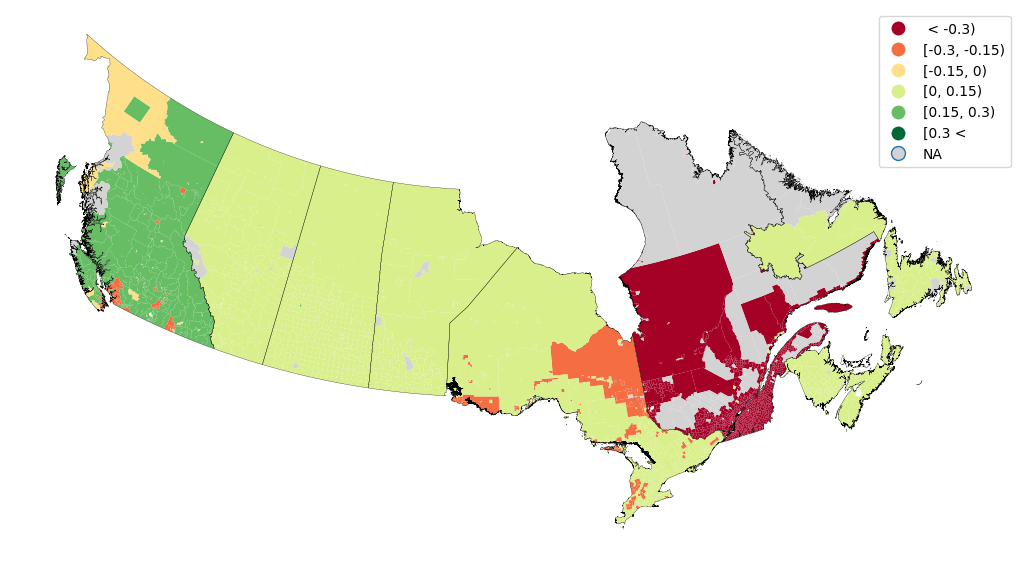

In [35]:
fig, ax = plt.subplots(1, 1, figsize = (13, 13))

ax.set_aspect("equal")
province.plot(
    ax = ax,
    edgecolor = "black", 
    facecolor = "none",
    # color = "lightgrey",
    linewidth = 0.2,
    zorder = 2)

country_tmax.plot(
    column = "group",
    ax = ax, 
    cmap = "RdYlGn", alpha = 1, linewidth = 1,
    zorder = 1,
    legend = True,
    missing_kwds={
        "color": "lightgrey",
        "label": "NA",
    }
    )

# ax.set_title("TBD")
ax.axis("off")
plt.show()

In [36]:
fig.savefig("./figs/cf_tmax.png", dpi = 300, transparent = False)
fig.savefig("./figs/cf_tmax2.png", dpi = 300, transparent = True)

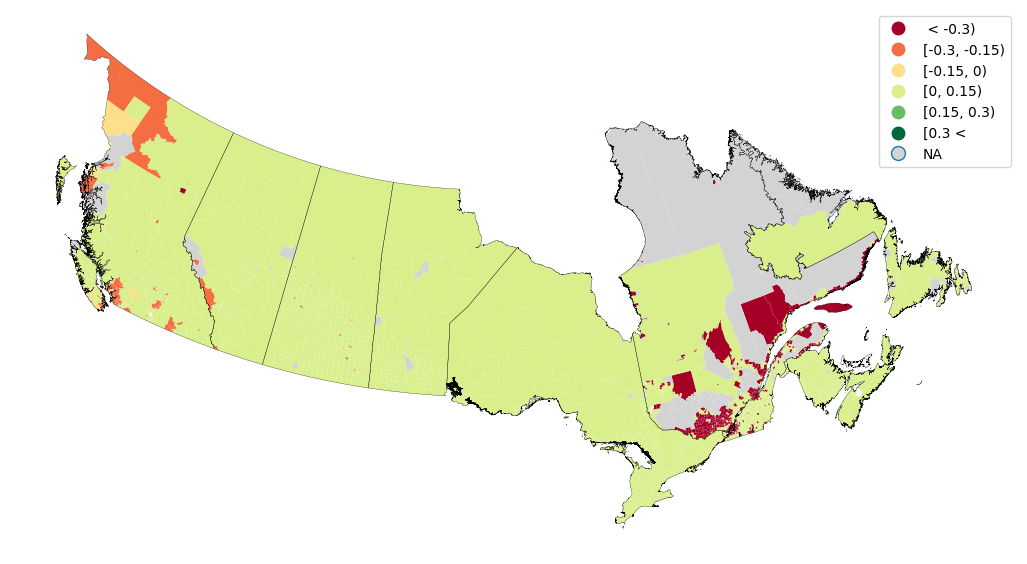

In [37]:
fig, ax = plt.subplots(1, 1, figsize = (13, 13))

ax.set_aspect("equal")
province.plot(
    ax = ax,
    edgecolor = "black", 
    facecolor = "none",
    # color = "lightgrey",
    linewidth = 0.2,
    zorder = 2)

country_tmin.plot(
    column = "group",
    ax = ax, 
    cmap = "RdYlGn", alpha = 1, linewidth = 1,
    zorder = 1,
    legend = True,
    missing_kwds={
        "color": "lightgrey",
        "label": "NA",
    }
    )

# ax.set_title("TBD")
ax.axis("off")
plt.show()

In [38]:
fig.savefig("./figs/cf_tmin.png", dpi = 300, transparent = False)
fig.savefig("./figs/cf_tmin2.png", dpi = 300, transparent = True)

In [41]:
# most negatively affected by tmax
print(merged_tmax[["CSDNAME", "provincename", "Dominant_NAICS", "ATE(tmax)"]].sort_values(
    by = "ATE(tmax)").head(5))

# most positively affected by tmax
print(merged_tmax.loc[pd.isnull(merged_tmax["ATE(tmax)"]) == False, ["CSDNAME", "provincename", "Dominant_NAICS", "ATE(tmax)"]].sort_values(
    by = "ATE(tmax)").tail(5))

        CSDNAME provincename             Dominant_NAICS  ATE(tmax)
1820       Mayo       Quebec  X91.Public.administration     -0.607
1841   La Pêche       Quebec  X91.Public.administration     -0.607
2112    Salluit       Quebec  X91.Public.administration     -0.607
1882  Sheenboro       Quebec  X91.Public.administration     -0.607
2050   Pessamit       Quebec  X91.Public.administration     -0.607
                          CSDNAME      provincename  \
4620  Comox Valley B (Lazo North)  British_Columbia   
4619               Comox Valley A  British_Columbia   
4613                  Tsa Xana 18  British_Columbia   
4628                     qathet D  British_Columbia   
4318                     Sparwood  British_Columbia   

                                         Dominant_NAICS  ATE(tmax)  
4620  X11.Agriculture.forestry.fishing.hunting.21.Mi...      0.219  
4619  X11.Agriculture.forestry.fishing.hunting.21.Mi...      0.219  
4613  X11.Agriculture.forestry.fishing.hunting.21.Mi...     

In [42]:
# most negatively affected by tmin
print(merged_tmin[["CSDNAME", "provincename", "Dominant_NAICS", "ATE(tmin)"]].sort_values(
    by = "ATE(tmin)").head(5))

# most positively affected by tmin
print(merged_tmin.loc[pd.isnull(merged_tmin["ATE(tmin)"]) == False, ["CSDNAME", "provincename", "Dominant_NAICS", "ATE(tmin)"]].sort_values(
    by = "ATE(tmin)").tail(5))

                   CSDNAME provincename             Dominant_NAICS  ATE(tmin)
2117               Nemaska       Quebec  X91.Public.administration     -0.528
2103      Kangiqsualujjuaq       Quebec  X91.Public.administration     -0.528
2104              Kuujjuaq       Quebec  X91.Public.administration     -0.528
2051  Rivière-aux-Outardes       Quebec  X91.Public.administration     -0.528
2105              Tasiujaq       Quebec  X91.Public.administration     -0.528
           CSDNAME  provincename                         Dominant_NAICS  \
3208        Lebret  Saskatchewan  X48.49.Transportation.and.warehousing   
3755     Big Shell  Saskatchewan  X48.49.Transportation.and.warehousing   
3244      Markinch  Saskatchewan  X48.49.Transportation.and.warehousing   
3678    Wakaw Lake  Saskatchewan  X48.49.Transportation.and.warehousing   
3550  Mosquito 109  Saskatchewan  X48.49.Transportation.and.warehousing   

      ATE(tmin)  
3208       0.19  
3755       0.19  
3244       0.19  
3678     